In [18]:
#import required python libraries
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import mglearn
%matplotlib inline

In [19]:
#reading data from csv file
complex_data = pd.read_csv('Complex8_N15.csv')
complex_data.describe()

,Unnamed: 0,V1,V2,V3
count,2933.000000,2933.000000,2933.000000,2933.000000
mean,1467.000000,328.791936,207.013567,4.310263
std,846.828495,196.784511,115.543227,2.000824
min,1.000000,-323.336997,-144.886598,0.000000
25%,734.000000,168.464000,103.718637,3.000000
50%,1467.000000,315.448917,220.164603,5.000000
75%,2200.000000,491.867000,298.031000,6.000000
max,2933.000000,1057.381435,625.147109,7.000000


In [3]:
complex_data.head()

,Unnamed: 0,V1,V2,V3
0,1,563.225,56.748,0
1,2,564.887,58.119,0
2,3,565.434,68.061,0
3,4,565.926,79.953,0
4,5,566.762,69.405,0


In [4]:
#setting up kmeans
kmeans = KMeans(8)
kmeans.fit_predict(complex_data)

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [5]:
#copying complex data into another element
clusters = complex_data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(complex_data)

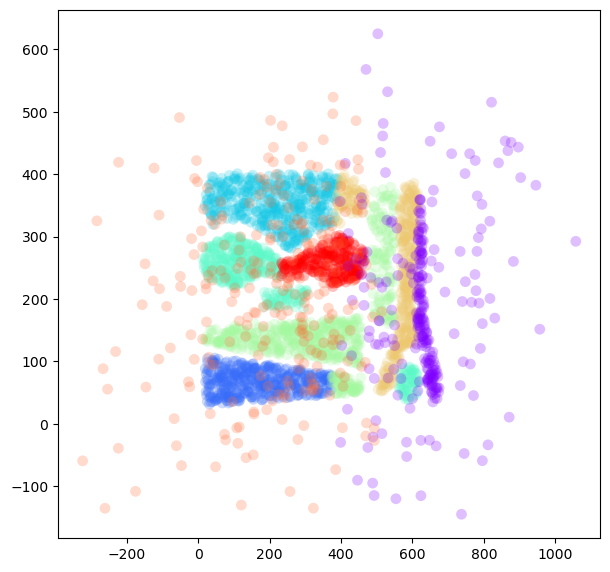

In [6]:
#visualize them using plot 
fig,ax = plt.subplots(figsize=(7, 7), dpi=100) 
plt.scatter(clusters['V1'],clusters['V2'],c=clusters['cluster_pred'],cmap='rainbow',  alpha=0.25, s=60, linewidths=0)
plt.show();

In [7]:
#Agglomerative clustering with proper parameters 
agg = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
assignment = agg.fit_predict(clusters)

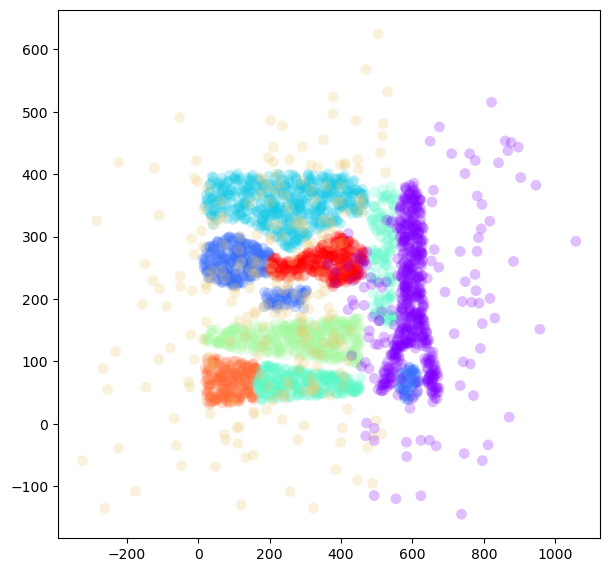

In [11]:
# visualize them using plot 
fig,ax = plt.subplots(figsize=(7, 7), dpi=100) 
ax.scatter(clusters.iloc[:,1], clusters.iloc[:,2], c=agg.labels_, cmap='rainbow',alpha=0.25, s=60, linewidths=0);

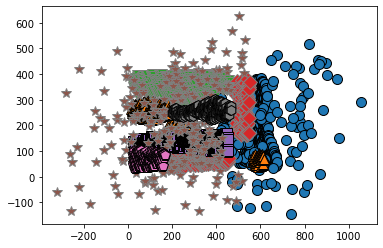

In [20]:
mglearn.discrete_scatter(clusters.iloc[:,1], clusters.iloc[:,2], assignment);

In [21]:
#DBSCAN with proper parameters to predict clusters 
dbscan = DBSCAN()
clf= dbscan.fit_predict(clusters)
print("Cluster memberships:\n{}".format(clf))

Cluster memberships:
[-1 -1 -1 ... -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


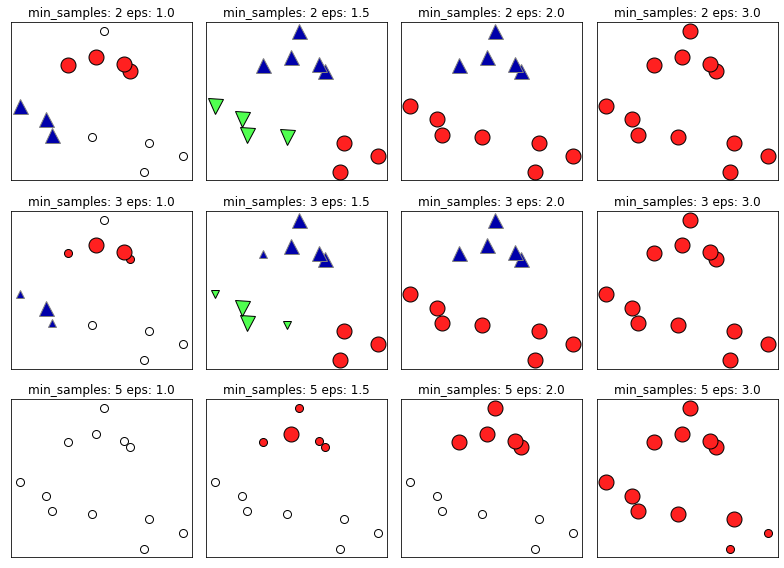

In [22]:
mglearn.plots.plot_dbscan()

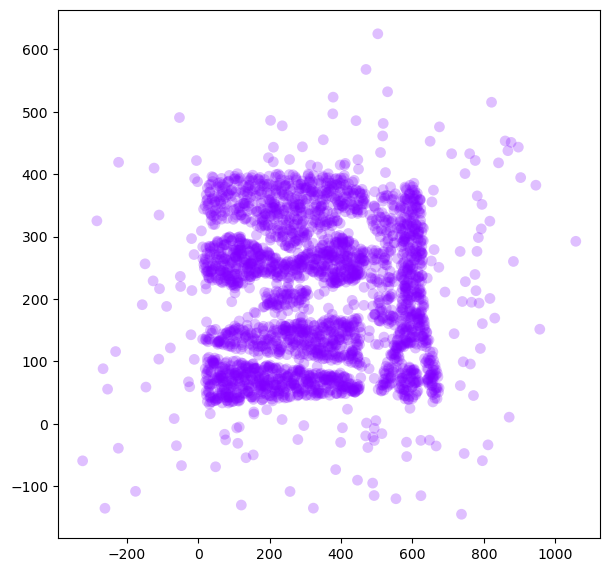

In [23]:
# plot the cluster assignments
fig,ax = plt.subplots(figsize=(7, 7), dpi=100)
ax.scatter(clusters.iloc[:, 1], clusters.iloc[:, 2], c=clf, cmap='rainbow',alpha=0.25, s=60, linewidths=0);